## **Uncovering Suicide Risk: A Data-Driven Look at Age, Race, and Gender**

**Author:** Sabriya Sowers  
**Date:** February 16, 2025  

**Purpose**  
This project analyzes historical suicide rates in the United States to identify the demographic groups most at risk. It examines trends over time, age groups most affected, differences by sex and race, and any high risk populations.

In [111]:
import pandas as pd

# Load the dataset
file_path = "data/suicide_data.csv"
df = pd.read_csv(file_path)

# Display basic information about the dataset
df.info()

# Display the first 10 rows. The default is 5 rows if ()
print(df.head(10))  # Prints output

# Display the data shape 
print('Dataset Shape', df.shape) # Prints (rows, columns)

# Display the data type
print('Data Types:\n', df.dtypes) # Prints data types of each column

# Inspect first rows of the DataFrame
print('First 5 rows:\n', df.head()) # Ensures output is visible

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6390 entries, 0 to 6389
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   INDICATOR       6390 non-null   object 
 1   UNIT            6390 non-null   object 
 2   UNIT_NUM        6390 non-null   int64  
 3   STUB_NAME       6390 non-null   object 
 4   STUB_NAME_NUM   6390 non-null   int64  
 5   STUB_LABEL      6390 non-null   object 
 6   STUB_LABEL_NUM  6390 non-null   float64
 7   YEAR            6390 non-null   int64  
 8   YEAR_NUM        6390 non-null   int64  
 9   AGE             6390 non-null   object 
 10  AGE_NUM         6390 non-null   float64
 11  ESTIMATE        5484 non-null   float64
 12  FLAG            906 non-null    object 
dtypes: float64(3), int64(4), object(6)
memory usage: 649.1+ KB
                 INDICATOR                                               UNIT  \
0  Death rates for suicide  Deaths per 100,000 resident population, age-a

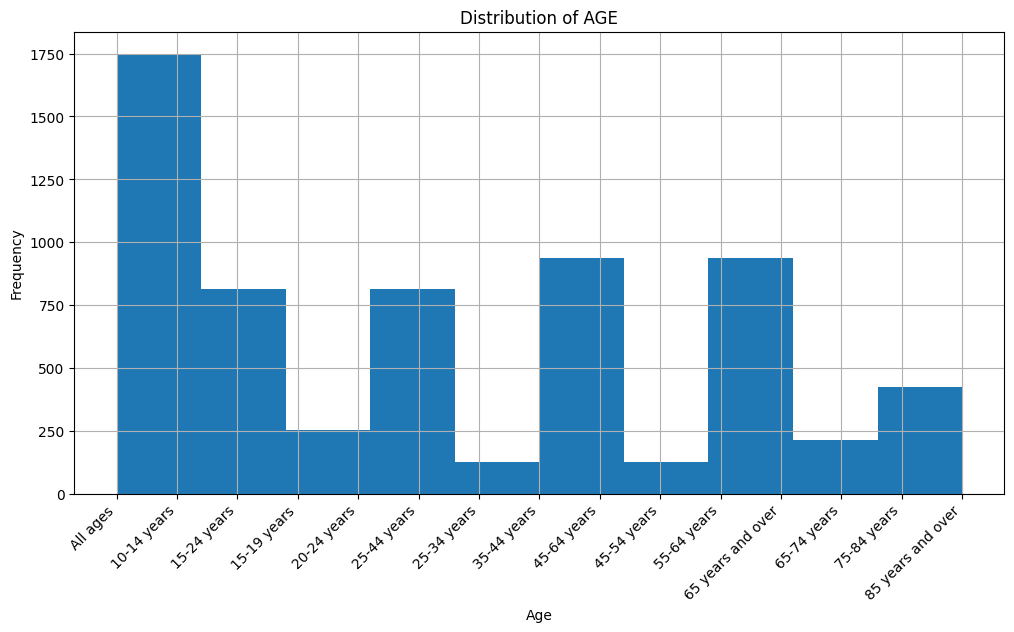

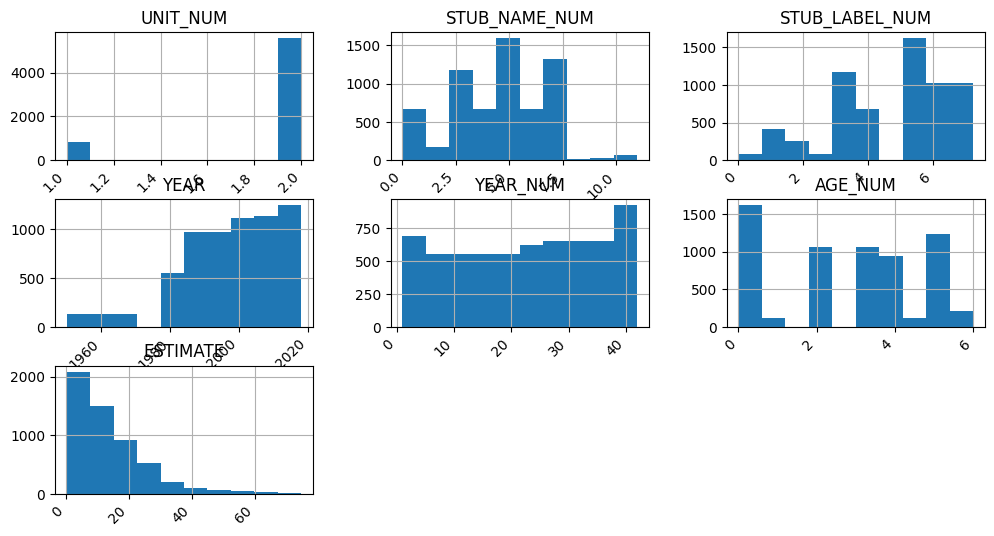

In [129]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))

# Inspect histogram by numerical column
df['AGE'].hist()
plt.title('Distribution of AGE')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.xticks(rotation=45, ha='right')  # Rotate labels for better readability
plt.show()

# Inspect histograms for all numerical columns
df.hist(figsize=(12, 6))

# Rotate labels for all histograms
for ax in plt.gcf().axes:  # Loop through all subplots
    plt.sca(ax)
    plt.xticks(rotation=45, ha='right')

# Show the plots
plt.show()

By analyzing these histograms, it can be determineed whether further transformations, data cleaning, or outlier removal are needed before moving to deeper statistical analysis.

In [115]:
import pandas as pd

# Load the dataset
df = pd.read_csv('data/suicide_data.csv')

# Display first 5 rows
df.head()

,INDICATOR,UNIT,UNIT_NUM,STUB_NAME,STUB_NAME_NUM,STUB_LABEL,STUB_LABEL_NUM,YEAR,YEAR_NUM,AGE,AGE_NUM,ESTIMATE,FLAG
0,Death rates for suicide,"Deaths per 100,000 resident population, age-ad...",1,Total,0,All persons,0.0,1950,1,All ages,0.0,13.2,NaN
1,Death rates for suicide,"Deaths per 100,000 resident population, age-ad...",1,Total,0,All persons,0.0,1960,2,All ages,0.0,12.5,NaN
2,Death rates for suicide,"Deaths per 100,000 resident population, age-ad...",1,Total,0,All persons,0.0,1970,3,All ages,0.0,13.1,NaN
3,Death rates for suicide,"Deaths per 100,000 resident population, age-ad...",1,Total,0,All persons,0.0,1980,4,All ages,0.0,12.2,NaN
4,Death rates for suicide,"Deaths per 100,000 resident population, age-ad...",1,Total,0,All persons,0.0,1981,5,All ages,0.0,12.3,NaN


In [119]:
# Rename a column (example: changing 'old_column_name' to 'new_column_name')
df.rename(columns={'STUB_LABEL': 'GENDER_RACE'}, inplace=True)

# Check column names
df.head()

,INDICATOR,UNIT,UNIT_NUM,STUB_NAME,STUB_NAME_NUM,GENDER_RACE,STUB_LABEL_NUM,YEAR,YEAR_NUM,AGE,AGE_NUM,ESTIMATE,FLAG
0,Death rates for suicide,"Deaths per 100,000 resident population, age-ad...",1,Total,0,All persons,0.0,1950,1,All ages,0.0,13.2,NaN
1,Death rates for suicide,"Deaths per 100,000 resident population, age-ad...",1,Total,0,All persons,0.0,1960,2,All ages,0.0,12.5,NaN
2,Death rates for suicide,"Deaths per 100,000 resident population, age-ad...",1,Total,0,All persons,0.0,1970,3,All ages,0.0,13.1,NaN
3,Death rates for suicide,"Deaths per 100,000 resident population, age-ad...",1,Total,0,All persons,0.0,1980,4,All ages,0.0,12.2,NaN
4,Death rates for suicide,"Deaths per 100,000 resident population, age-ad...",1,Total,0,All persons,0.0,1981,5,All ages,0.0,12.3,NaN


### ***Suicide Rates Over Time***

The **goal** of this analysis is to examine how suicide rates have changed over time and identify key years with the highest, lowest, and most significant increases. This study explores trends over a 70-year period to determine long-term patterns, highlight years with notable peaks and declines, and assess any significant upticks in rates. 

A line chart is chosen for visualization because it effectively represents trends over time, making it easier to identify fluctuations, key turning points, and overall patterns in the data.

**Markers are added to highlight key years:**
- Red: Peak suicide rate year (1950)
- Blue: Lowest suicide rate year (2003)
- Green: Significant uptick year (2018)

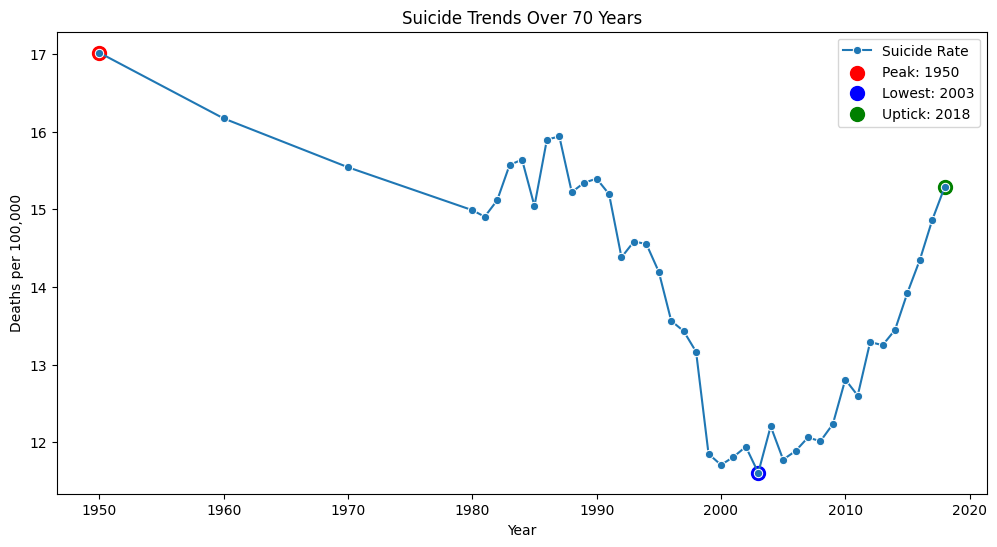

In [121]:
import matplotlib.pyplot as plt
import seaborn as sns

# Aggregate data to get the average suicide rate per year
df_yearly = df.groupby('YEAR', as_index=False)['ESTIMATE'].mean()

# Find the highest and lowest suicide rate years
max_year = df_yearly.loc[df_yearly['ESTIMATE'].idxmax()]
min_year = df_yearly.loc[df_yearly['ESTIMATE'].idxmin()]

# Identify the uptick year after 2003 (sharp increase)
uptick_year = df_yearly[df_yearly['YEAR'] >= 2003].sort_values(by='ESTIMATE', ascending=False).iloc[0]

# Convert peak, lowest, and uptick years to integers
max_year_year = int(max_year['YEAR'])
min_year_year = int(min_year['YEAR'])
uptick_year_year = int(uptick_year['YEAR'])

# Plot the line chart
plt.figure(figsize=(12, 6))
sns.lineplot(data=df_yearly, x='YEAR', y='ESTIMATE', marker='o', label="Suicide Rate")

# Highlight peak, lowest, and uptick points
plt.scatter(max_year_year, max_year['ESTIMATE'], color='red', s=100, label=f"Peak: {max_year_year}")
plt.scatter(min_year_year, min_year['ESTIMATE'], color='blue', s=100, label=f"Lowest: {min_year_year}")
plt.scatter(uptick_year_year, uptick_year['ESTIMATE'], color='green', s=100, label=f"Uptick: {uptick_year_year}")

# Labels & title
plt.title('Suicide Trends Over 70 Years')
plt.xlabel('Year')
plt.ylabel('Deaths per 100,000')
plt.legend()
plt.show()

### ***Insights***
- **The high suicide rate in the 1950s** was likely due to:
  - **War-related trauma** (aging veterans from World War I, World War II, and the Korean War)  
  - **Societal pressures** and shifting cultural expectations  
  - **Economic changes** and Cold War anxieties  
  - **Higher substance abuse rates**  
  - **Lack of mental health support** and limited treatment options  
- **The lower suicide rates in 2003** may be attributed to:
  - **Advancements in mental health care**  
  - **Economic recovery** and improved financial stability  
  - **Lower substance abuse rates**  
  - **Increased awareness and prevention efforts**  
- **The noticeable uptick in 2018** was likely driven by:
  - **The worsening opioid epidemic**  
  - **Limited access to mental health care**  
  - **Economic stress and financial instability**  

### ***Age-Based Trends***

The **goal** of this analysis is to compare suicide rates across different age groups in three specific years: 1950, 2003, and 2018. This study aims to identify age-related trends, observe whether certain age groups experience higher suicide rates, and assess how these trends have shifted over time. By focusing on key years, this analysis provides insights into generational changes in suicide rates and helps determine if specific age groups are at greater risk during different periods.

A bar chart is chosen because it is ideal for comparing values across distinct categories, in this case, age groups. The hue feature (color coding for different years) allows for a clear visual comparison between 1950, 2003, and 2018, making it easy to observe which age groups experienced increases or decreases over time.

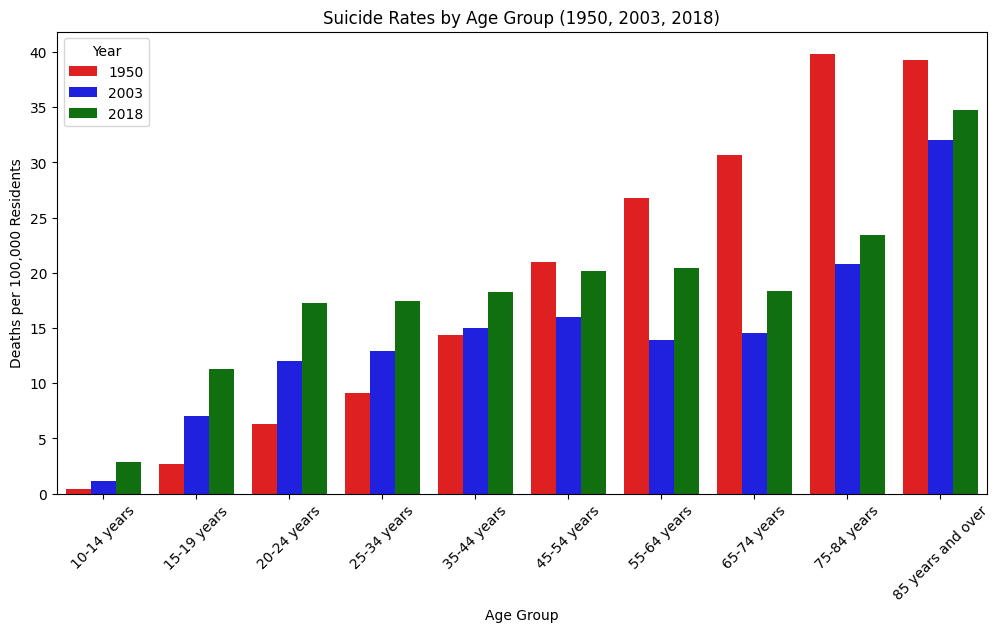

In [122]:
import matplotlib.pyplot as plt
import seaborn as sns

# Define set of age groups
valid_age_groups = ['10-14 years', '15-19 years', '20-24 years', '25-34 years', '35-44 years', '45-54 years', '55-64 years', '65-74 years', '75-84 years', '85 years and over']

# Filter dataset for just 1950, 2003, and 2018
df_filtered = df[(df['YEAR'].isin([1950, 2003, 2018])) & (df['AGE'].isin(valid_age_groups))]

# Define bar colors
custom_palette = {1950: 'red', 2003: 'blue', 2018: 'green'}

# Create bar chart
plt.figure(figsize=(12, 6))
sns.barplot(data=df_filtered, x='AGE', y='ESTIMATE', hue='YEAR', palette=custom_palette, errorbar=None)

# Rotate x-axis labels for easier viewing
plt.xticks(rotation=45)

# Titles and labels
plt.title('Suicide Rates by Age Group (1950, 2003, 2018)')
plt.xlabel('Age Group')
plt.ylabel('Deaths per 100,000 Residents')
plt.legend(title='Year')

# Show the plot
plt.show()

# print(df['AGE'].unique())

### ***Insights***
- **Suicide risks have shifted over time**, from primarily affecting older adults in 1950 to a rise among younger adults in 2018.  
- **Factors contributing to lower elderly suicide rates over time:**
  - Advancements in **mental health care**  
  - **Improved healthcare access** and expanded support services  
  - **Economic stability** in certain periods  
- **New challenges contributing to higher suicide rates among younger generations:**
  - **Social media** and its mental health impact  
  - **Opioid crisis**, which became widespread after 2003  
  - **Economic stress** and financial instability  
- **The National Suicide Prevention Hotline (launched in 2001)** may have played a role in bringing suicide rates to their lowest point in 2003.  
- **In 2003, the opioid crisis had not yet peaked**, meaning drug-related suicides were not as widespread as in later years.  

### ***Suicide Rates by Race and Gender***

The **goal** of this analysis is to compare suicide rates by race and gender across three key years: 1950, 2003, and 2018. This study seeks to identify disparities in suicide rates among different racial and gender groups and assess how these disparities have evolved over time. By focusing on broad racial categories for both men and women, the analysis aims to highlight which groups have seen the most significant changes in suicide rates and whether certain racial or gender groups are at higher risk. 

A bar chart is chosen because it provides a clear visual comparison of suicide rates across different race and gender groups. The use of color-coded bars for each year (1950, 2003, and 2018) allows for easy identification of trends and disparities over time.

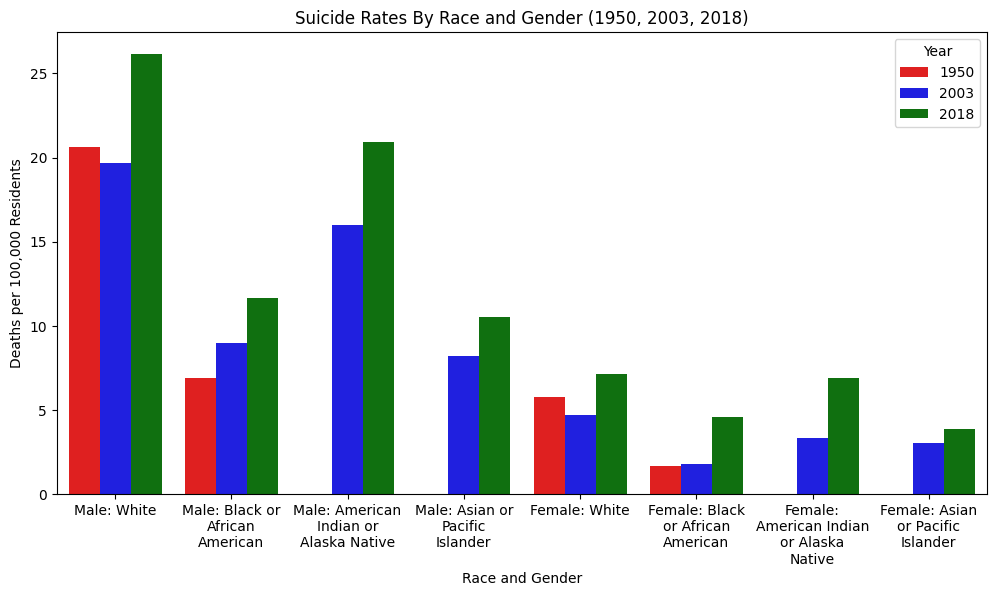

In [128]:
import matplotlib.pyplot as plt
import seaborn as sns
import textwrap
import matplotlib.ticker as mticker

# Define broad race categories (excluding age-specific)
race_categories = [
    'Male: White', 'Male: Black or African American', 'Male: American Indian or Alaska Native', 'Male: Asian or Pacific Islander',
    'Female: White', 'Female: Black or African American', 'Female: American Indian or Alaska Native', 'Female: Asian or Pacific Islander'
]

# Filter dataset for 1950, 2003, and 2018
df_filtered = df[(df['YEAR'].isin([1950, 2003, 2018])) & (df['GENDER_RACE'].isin(race_categories))]

# Define colors
custom_palette = {1950: 'red', 2003: 'blue', 2018: 'green'}

# Wrap labels function
def wrap_labels(labels, width=15):
    return ['\n'.join(textwrap.wrap(label, width)) for label in labels]

# Create bar chart
plt.figure(figsize=(12, 6))
ax = sns.barplot(data=df_filtered, x='GENDER_RACE', y='ESTIMATE', hue='YEAR', palette=custom_palette, errorbar=None)

# Get x-tick positions and labels
labels = [item.get_text() for item in ax.get_xticklabels()]
wrapped_labels = wrap_labels(labels, width=15)

# Ensure ticks are explicitly set before applying labels. This basically removes a warning message that popped up.
ax.set_xticks(range(len(labels))) 
ax.set_xticklabels(wrapped_labels)

# Rotate x-axis labels for easier viewing
plt.xticks(rotation=0)

# Titles and labels
plt.title('Suicide Rates By Race and Gender (1950, 2003, 2018)')
plt.xlabel('Race and Gender')
plt.ylabel('Deaths per 100,000 Residents')
plt.legend(title='Year')

# Show the plot
plt.show()

# print(df['STUB_LABEL'].unique())

### ***Insights***

- **White males have the highest suicide rates** across all years, likely due to **economic stress, cultural factors, and access to lethal means**.  
- **Men have higher suicide rates than women**, partly due to:  
  - More **lethal suicide methods**  
  - Higher likelihood of **military service**, especially in **1950 and 2003** (post-WWII, Korea, Vietnam)  
- **Suicide rates have increased over time**, particularly for **White males**, possibly linked to:  
  - **Economic downturns**  
  - **Declining social support**  
  - **Mental health stigma**  
- **American Indian or Alaska Native (AI/AN) male suicide rates surged in 2018**, likely influenced by:  
  - The **opioid crisis**  
  - A spike in **veteran suicides** (AI/AN males have the highest **military service rate per capita**)  
  - **Economic hardship**  
  - **Poor healthcare access**  